In [1]:
# We have used the dataset from  https://www.tiingo.com/. We need to sign in to get the Api 

In [11]:
import tensorflow as tf
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime



In [3]:
appl_data= pdr.get_data_tiingo('AAPL', api_key='e74b03509c582dfc99e2a06c2e24346f68946407')

In [4]:
appl_data.to_csv("AAPL.csv")

In [5]:
appl_data= pd.read_csv("AAPL.csv")
appl_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-18 00:00:00+00:00,107.48,108.95,106.94,108.89,60821461,24.987674,25.329430,24.862132,25.315481,243285844,0.0,1.0
1,AAPL,2016-04-19 00:00:00+00:00,106.91,108.00,106.23,107.88,32384879,24.855157,25.108568,24.697066,25.080669,129539516,0.0,1.0
2,AAPL,2016-04-20 00:00:00+00:00,107.13,108.09,106.06,106.64,30611030,24.906304,25.129491,24.657543,24.792386,122444120,0.0,1.0
3,AAPL,2016-04-21 00:00:00+00:00,105.97,106.93,105.52,106.93,31552525,24.636619,24.859807,24.532000,24.859807,126210100,0.0,1.0
4,AAPL,2016-04-22 00:00:00+00:00,105.68,106.48,104.62,105.01,33683121,24.569198,24.755188,24.322762,24.413432,134732484,0.0,1.0


In [6]:
appl_data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-04-12 00:00:00+00:00,131.24,132.85,130.630,132.52,91419983,131.24,132.85,130.630,132.52,91419983,0.0,1.0
1255,AAPL,2021-04-13 00:00:00+00:00,134.43,134.66,131.930,132.44,91266545,134.43,134.66,131.930,132.44,91266545,0.0,1.0
1256,AAPL,2021-04-14 00:00:00+00:00,132.03,135.00,131.655,134.94,87222782,132.03,135.00,131.655,134.94,87222782,0.0,1.0
1257,AAPL,2021-04-15 00:00:00+00:00,134.50,135.00,133.640,133.82,89347102,134.50,135.00,133.640,133.82,89347102,0.0,1.0
1258,AAPL,2021-04-16 00:00:00+00:00,134.16,134.67,133.280,134.30,84922386,134.16,134.67,133.280,134.30,84922386,0.0,1.0


In [7]:
appl_data.isna().any()

symbol         False
date           False
close          False
high           False
low            False
open           False
volume         False
adjClose       False
adjHigh        False
adjLow         False
adjOpen        False
adjVolume      False
divCash        False
splitFactor    False
dtype: bool

<AxesSubplot:>

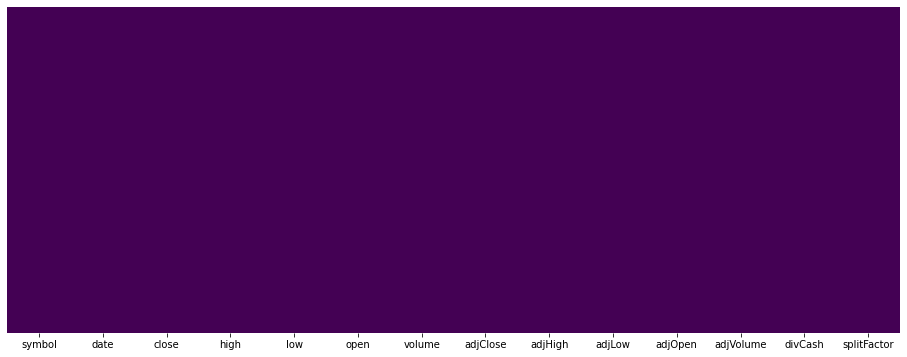

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(appl_data.isnull(),yticklabels= False, cbar= False,cmap='viridis' )

In [7]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


<AxesSubplot:>

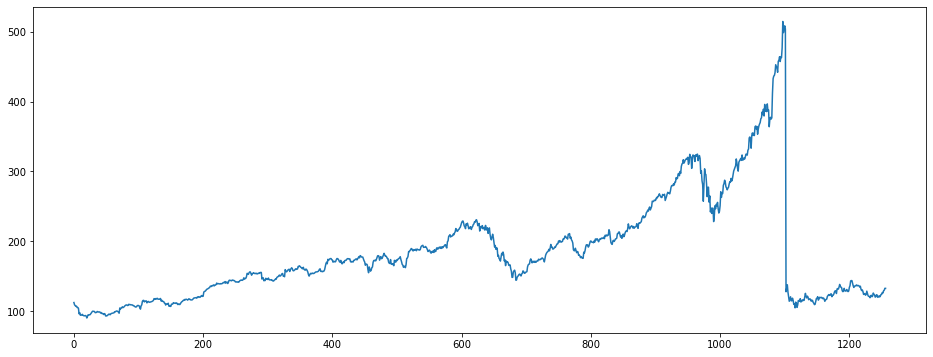

In [8]:
appl_data['open'].plot(figsize=(16,6))

In [9]:
appl_data.shape

(1257, 14)

In [10]:
appl_data1= appl_data.reset_index()['close']

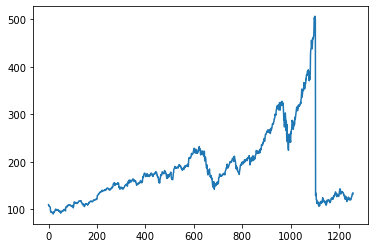

In [11]:
plt.plot(appl_data1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
appl_data1_scaled= scaler.fit_transform(np.array(appl_data1).reshape(-1,1))

In [13]:
appl_data1_scaled.shape

(1257, 1)

In [14]:
training_size=int(len(appl_data1_scaled)*0.65)
test_size= len(appl_data1_scaled)-training_size
train_data,test_data= appl_data1_scaled[0:training_size,:],appl_data1_scaled[training_size:len(appl_data1_scaled),:1]

In [15]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)    

In [16]:
time_step=100
x_train, y_train= create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [17]:
print(x_train)

[[0.04692724 0.0412267  0.03985568 ... 0.03942273 0.04182802 0.04175586]
 [0.0412267  0.03985568 0.04038485 ... 0.04182802 0.04175586 0.04334336]
 [0.03985568 0.04038485 0.03759471 ... 0.04175586 0.04334336 0.03651233]
 ...
 [0.19352977 0.19261575 0.19384245 ... 0.27393867 0.26381239 0.26674684]
 [0.19261575 0.19384245 0.19648827 ... 0.26381239 0.26674684 0.27153337]
 [0.19384245 0.19648827 0.19415514 ... 0.26674684 0.27153337 0.26797354]]


In [18]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(x_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [20]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [22]:
regressor= Sequential()


In [23]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
regressor.add(Dropout(0.3))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))


regressor.add(Dense(units=1))

In [24]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [25]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,batch_size=32,verbose=1)

Epoch 1/150
23/23 [==============================] - 13s 576ms/step - loss: 0.0083 - val_loss: 0.0453
Epoch 2/150
23/23 [==============================] - 10s 425ms/step - loss: 0.0022 - val_loss: 0.0317
Epoch 3/150
23/23 [==============================] - 10s 427ms/step - loss: 0.0013 - val_loss: 0.0256
Epoch 4/150
23/23 [==============================] - 10s 426ms/step - loss: 0.0011 - val_loss: 0.0244
Epoch 5/150
23/23 [==============================] - 10s 416ms/step - loss: 0.0011 - val_loss: 0.0242
Epoch 6/150
23/23 [==============================] - 10s 421ms/step - loss: 0.0011 - val_loss: 0.0238
Epoch 7/150
23/23 [==============================] - 9s 396ms/step - loss: 9.6225e-04 - val_loss: 0.0228
Epoch 8/150
23/23 [==============================] - 10s 423ms/step - loss: 9.0422e-04 - val_loss: 0.0212
Epoch 9/150
23/23 [==============================] - 9s 408ms/step - loss: 8.8571e-04 - val_loss: 0.0233
Epoch 10/150
23/23 [==============================] - 9s 409ms/step - lo

Epoch 78/150
23/23 [==============================] - 11s 481ms/step - loss: 2.7749e-04 - val_loss: 0.0107
Epoch 79/150
23/23 [==============================] - 11s 464ms/step - loss: 2.4272e-04 - val_loss: 0.0081
Epoch 80/150
23/23 [==============================] - 11s 492ms/step - loss: 2.9372e-04 - val_loss: 0.0078
Epoch 81/150
23/23 [==============================] - 12s 532ms/step - loss: 2.6710e-04 - val_loss: 0.0080
Epoch 82/150
23/23 [==============================] - 13s 549ms/step - loss: 2.6937e-04 - val_loss: 0.0084
Epoch 83/150
23/23 [==============================] - 12s 507ms/step - loss: 2.9548e-04 - val_loss: 0.0101
Epoch 84/150
23/23 [==============================] - 10s 451ms/step - loss: 2.6060e-04 - val_loss: 0.0077
Epoch 85/150
23/23 [==============================] - 10s 437ms/step - loss: 2.7057e-04 - val_loss: 0.0083
Epoch 86/150
23/23 [==============================] - 10s 433ms/step - loss: 2.5326e-04 - val_loss: 0.0082
Epoch 87/150
23/23 [=================

In [27]:
train_predict=regressor.predict(x_train)
test_predict= regressor.predict(x_test)

In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


167.78023878027622

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

249.14604792829522

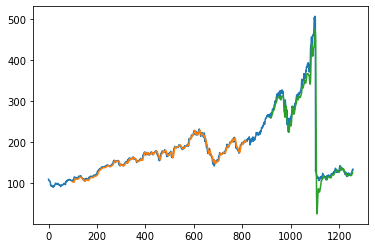

In [31]:
look_back=100
trainPredictPlot=numpy.empty_like(appl_data1_scaled)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+ look_back,:]=train_predict
testPredictPlot= numpy.empty_like(appl_data1_scaled)
testPredictPlot[:,:]= numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(appl_data1_scaled)-1,:]= test_predict
plt.plot(scaler.inverse_transform(appl_data1_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

440

In [33]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input= np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input= x_input.reshape((1,n_steps,1))
        yhat= regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input= x_input.reshape((1,n_steps,1))
        yhat= regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)        

[0.09426934]
101
1 day input [0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194
 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237
 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0

8 day output [[0.08516258]]
9 day input [0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743
 0.07276007 0.07425135 0.07468431 0.07110042 0.07651233 0.07855683
 0.08553217 0.08627781

16 day output [[0.07572705]]
17 day input [0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007 0.07425135
 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217 0.08627781
 0.09034275 0.09625977 0.10259771 0.09837643 0.10604931 0.09426934
 0.09562525 0.0949958 

24 day output [[0.06348342]]
25 day input [0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042
 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977
 0.10259771 0.09837643 0.10604931 0.09426934 0.09562525 0.0949958
 0.09328326 0.09129016 0.08942803 0.08780923 0.08640803 0.08516258
 0.08401451 0.08291584 

In [36]:
day_new=np.arange(1,101)
day_pred= np.arange(101,131)

In [37]:
len(appl_data1_scaled)

1257

In [38]:
df3=appl_data1_scaled.tolist()
df3.extend(lst_output)

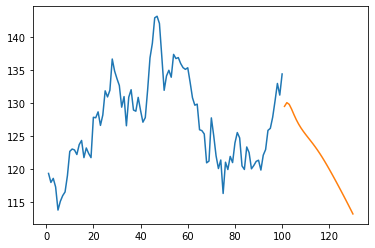

In [39]:
plt.plot(day_new,scaler.inverse_transform(appl_data1_scaled[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

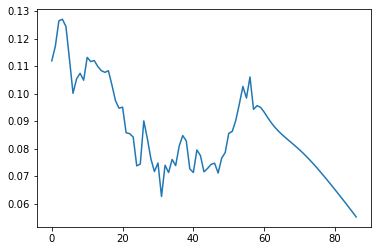

In [40]:
df3=appl_data1_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

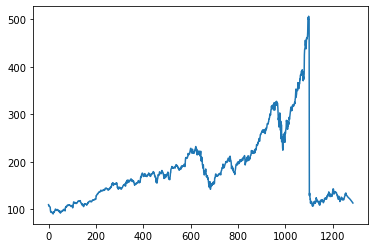

In [41]:
df3= scaler.inverse_transform(df3).tolist()
plt.plot(df3)